<IPython.core.display.Javascript object>


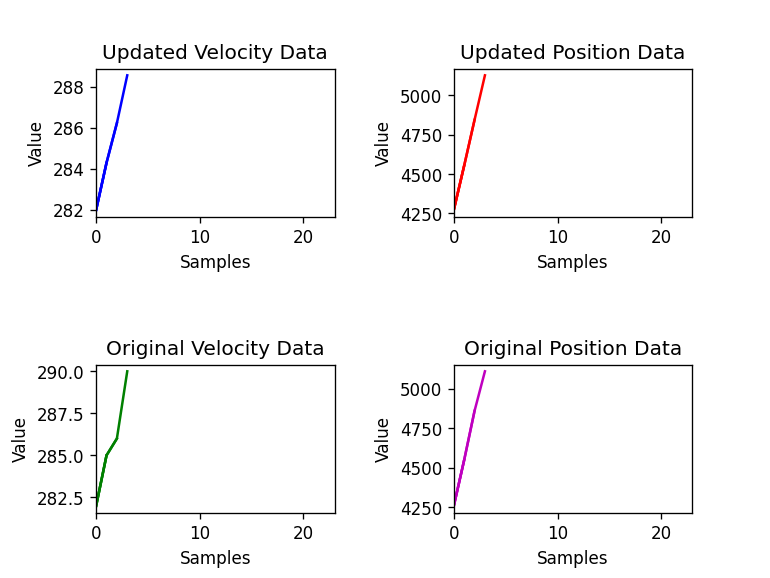

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import math

%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure()
ax = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 =  fig.add_subplot(224)
#ax4 = fig.add_subplot(325)
#ax5 = fig.add_subplot(326)

#increasing the gap between the subplots
plt.subplots_adjust(hspace=1, wspace=0.5)
fig.show()

def distance_between_latitudes(lat1, lat2):
    R = 6371  # Radius of the Earth in km

    lat1_rad = math.radians(lat1)
    lat2_rad = math.radians(lat2)

    delta_lat = lat2_rad - lat1_rad

    a = math.sin(delta_lat / 2) ** 2
    haversine_distance = 2 * R * math.asin(math.sqrt(a))

    return haversine_distance

def distance_between_longitudes(lon1, lon2):
    R = 6371  # Radius of the Earth in km

    lon1_rad = math.radians(lon1)
    lon2_rad = math.radians(lon2)

    delta_lon = lon2_rad - lon1_rad

    a = math.sin(delta_lon / 2) ** 2
    haversine_distance = 2 * R * math.asin(math.sqrt(a))

    return haversine_distance


ref_loc = []


In [12]:
dt = 1


 #change here
i = 0
e,f,g = [],[],[]
posdata =[]
veldata =[]
velorg  =[]
posorg  =[]

velocity_x = 280 #change here initial velocity
position_x = 4000 #change here initial position

variancep = 400 #change here
variancev = 25 #change here

for j in range(4):
    

    acceleration_x = 2 #random.randint(4,6) #change here
    
    position_x_gps = [4260,4550,4860,5110] #random.randint(-5,5) ## #change here
    velocity_x_gps =  [282,285,286,290] # random.randint(-5,5)## #change here
    
    
    #matrix I , identity matrix 
    I = np.identity(2,dtype = float)

    #matrix A,state transition matrix
    A = np.array([[1,dt],
                  [0,1]])

    #matrix B , Control Matrix
    B = np.array([[0.5*(dt**2)],
                  [dt]])

    #previous state matrix
    xk_1 = np.array([[position_x],
                     [velocity_x]])

    #control vector
    un=np.array([[acceleration_x]])

    #matrix xkp, predicted state matrix

    xkp = np.matmul(A,xk_1) + np.matmul(B,un) # + w
    
  


    #matrix pk_1, previous covariance matrix


    pk_1 = np.array([[variancep,0],
                     [0,variancev]])

    #matrix pkp, variance covariance predicted matrix

    pkp = np.matmul(A,np.matmul(pk_1,A.T)) #+ Q
    
    pkp[0][1] = 0
    pkp[1][0] = 0
    #print(pkp)


    #matrix H,observation matrix
    H = np.array([[1,0],
                  [0,1]]) #change this according to your dimension

    #matrix R, estimated mesurment errors(from data sheet/or by obseravation measuremnent)

    sheeterror_p = 25 #change here
    sheeterror_v=6 #change here

    R = np.array([[sheeterror_p**2,0],
                  [0,sheeterror_v**2]])


    #matrix S, innovation matrix

    S = np.matmul(H,np.matmul(pkp,H.T)) + R

    #matrix kg, kalman gain

    
    kg = np.matmul(np.matmul(pkp,H.T),np.linalg.inv(S))
    
    #print(kg)


    #matrix y, measurement matrix
    #consider updates from this matrix as gps matrix updates.0

    y = np.array([[position_x_gps[j]],
                  [velocity_x_gps[j]]])
    
    #print(position_x_gps)
    
    
    #matrix xk, updated state transition matrix

    xk = xkp + np.matmul(kg,(y - np.matmul(H,xkp)))
    
    print(f'\nthis is kalman gain', kg)
    print(f'\nthis is predicted state',xkp)
    print(f'\nthis is updated state',xk)
   # print(xk)

    #matrix pk, updated covariance matrix

    pk = np.matmul(I - np.matmul(kg,H),pkp)
    
    #print(pk)

    velup = xk[1,:]
    posup = xk[0,:]
    variancep = pk[0][0]
    variancev = pk[1][1]
   # print(xk)
#     print(pk_1)
#     print(pk)
#     print(variancep)
#     print(variancev)
    
    
   
    
#     print('this is the new updated state matrix :')
#     print(xk)
#     print('\n this is the new updated covariance matrix :')
#     print(pk)
#     print('\n updated Position')
#     print(posup)

#     print('\n updated velocity')
#     print(velup)

    print('this is  posdata', posdata)
    print('\n this is posup', posup)
    posdata = np.append(posdata,posup,axis = 0).tolist()
    veldata = np.append(veldata,velup,axis = 0).tolist()
    velorg.append(velocity_x_gps[j])
    posorg.append(position_x_gps[j])
    
    
    position_x = posup[0]
    velocity_x = velup[0]
    
    #print(position_x)
    #print(velocity_x)
    
    
    #plotting the live data from mock sensors
    
    e.append(i)
    # print('\n this is x axis: ')
    #print(e)
    #f.append(random.uniform(1,10))
    #g.append(random.uniform(1,10))
    ax.plot(e,veldata, color ='b')
    ax1.plot(e,posdata,color = 'r')
    ax2.plot(e,velorg,color ='g')
    ax3.plot(e,posorg,color = 'm')
    fig.canvas.draw()
    time.sleep(0.1)
    ax.set_xlim(left = max(0, i-90),right = i+20)
    ax1.set_xlim(left = max(0, i-90),right = i+20)
    ax2.set_xlim(left = max(0, i-90),right = i+20)
    ax3.set_xlim(left = max(0, i-90),right = i+20)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Value')
    ax1.set_xlabel('Samples')
    ax1.set_ylabel('Value')
    ax2.set_xlabel('Samples')
    ax2.set_ylabel('Value')
    ax3.set_xlabel('Samples')
    ax3.set_ylabel('Value')
    ax.set_title('Updated Velocity Data')
    ax1.set_title('Updated Position Data')
    ax2.set_title('Original Velocity Data')
    ax3.set_title('Original Position Data')
    i+=1
    #print(posdata)
    #print(posdata.shape)
    #print(e.shape)
    
    
# print(type(output))
print(' \nnew posdata ')
print(posdata)
print('\n new veldata')
print(veldata)
print('\n original pos data')
print(posorg)
print('\n original vel data')
print(velorg)





this is kalman gain [[0.4047619  0.        ]
 [0.         0.40983607]]

this is predicted state [[4281.]
 [ 282.]]

this is updated state [[4272.5]
 [ 282. ]]
this is  posdata []

 this is posup [4272.5]

this is kalman gain [[0.29990053 0.        ]
 [0.         0.29069767]]

this is predicted state [[4555.5]
 [ 284. ]]

this is updated state [[4553.85054707]
 [ 284.29069767]]
this is  posdata [4272.5]

 this is posup [4553.85054707]

this is kalman gain [[0.24049367 0.        ]
 [0.         0.22522523]]

this is predicted state [[4839.14124475]
 [ 286.29069767]]

this is updated state [[4844.15764332]
 [ 286.22522523]]
this is  posdata [4272.5, 4553.850547072261]

 this is posup [4844.15764332]

this is kalman gain [[0.20221251 0.        ]
 [0.         0.18382353]]

this is predicted state [[5131.38286854]
 [ 288.22522523]]

this is updated state [[5127.05898493]
 [ 288.55147059]]
this is  posdata [4272.5, 4553.850547072261, 4844.157643316824]

 this is posup [5127.05898493]
 
new po

In [ ]:
plt.close()